<img src="https://d3njjcbhbojbot.cloudfront.net/api/utilities/v1/imageproxy/http://coursera-university-assets.s3.amazonaws.com/b9/c608c79b5c498a8fa55b117fc3282f/5.-Square-logo-for-landing-page---Alpha.png?auto=format%2Ccompress&dpr=1&w=180&h=180" >

<H1>Machine Learning Assignment - 2</H1>


<H3>Vasu Devan S</H3>

<h3>AIML - Section 1 - 2025AA05328</h3>

In [1]:
import os
import pickle
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score,recall_score, f1_score, matthews_corrcoef

def evaluate_model(y_true, y_pred, y_proba):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "AUC": roc_auc_score(y_true, y_proba),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1 Score": f1_score(y_true, y_pred),
        "MCC": matthews_corrcoef(y_true, y_pred)
    }

In [2]:
# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign") + "/marketing_campaign.xlsx"
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'arketing-campaign' dataset.
Path to dataset files: /kaggle/input/arketing-campaign/marketing_campaign.xlsx


In [3]:
df = pd.read_excel(path)

In [4]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [5]:
#Columns
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

<h2>Description</h2><ul>
  <li><b>ID</b>: Unique identifier for each customer</li>
  <li><b>Year_Birth</b>: Customer’s year of birth</li>
  <li><b>Education</b>: Customer’s level of education</li>
  <li><b>Marital_Status</b>: Customer’s marital status</li>
  <li><b>Income</b>: Customer’s yearly household income</li>
  <li><b>Kidhome</b>: Number of small children in the customer’s household</li>
  <li><b>Teenhome</b>: Number of teenagers in the customer’s household</li>
  <li><b>Dt_Customer</b>: Date of customer’s enrolment with the company</li>
  <li><b>Recency</b>: Number of days since the customer’s last purchase</li>
  <li><b>MntWines</b>: Amount spent on wine products in the last 2 years</li>
  <li><b>MntFruits</b>: Amount spent on fruit products in the last 2 years</li>
  <li><b>MntMeatProducts</b>: Amount spent on meat products in the last 2 years</li>
  <li><b>MntFishProducts</b>: Amount spent on fish products in the last 2 years</li>
  <li><b>MntSweetProducts</b>: Amount spent on sweet products in the last 2 years</li>
  <li><b>MntGoldProds</b>: Amount spent on gold products in the last 2 years</li>
  <li><b>NumDealsPurchases</b>: Number of purchases made using discounts</li>
  <li><b>NumWebPurchases</b>: Number of purchases made through the company’s website</li>
  <li><b>NumCatalogPurchases</b>: Number of purchases made using catalogues</li>
  <li><b>NumStorePurchases</b>: Number of purchases made directly in physical stores</li>
  <li><b>NumWebVisitsMonth</b>: Number of visits to the company’s website in the last month</li>
  <li><b>AcceptedCmp3</b>: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise</li>
  <li><b>AcceptedCmp4</b>: 1 if customer accepted the offer in the 4th campaign, 0 otherwise</li>
  <li><b>AcceptedCmp5</b>: 1 if customer accepted the offer in the 5th campaign, 0 otherwise</li>
  <li><b>AcceptedCmp1</b>: 1 if customer accepted the offer in the 1st campaign, 0 otherwise</li>
  <li><b>AcceptedCmp2</b>: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise</li>
  <li><b>Complain</b>: 1 if customer complained in the last 2 years, 0 otherwise</li>
  <li><b>Z_CostContact</b>: Cost of contacting a customer (constant value)</li>
  <li><b>Z_Revenue</b>: Revenue generated per campaign contact (constant value)</li>
  <li><b>Response</b>: 1 if customer accepted the offer in the last campaign, 0 otherwise</li>
</ul>


In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## Data Type and Counts

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
print(df["Education"].unique())
print(df["Marital_Status"].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


<h3>Observation</h3>

*   Education and Marital_Status are having Different Categories

*   Dt_Customer is Date format

*   Income has Missing value


We will one-hot encode the Categorical variables and Add mean value for missing Various in income

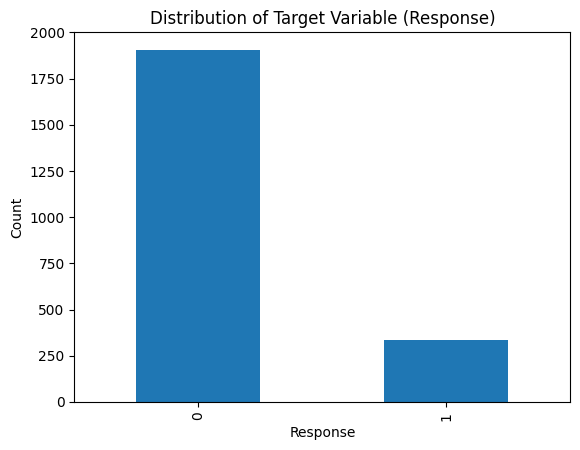

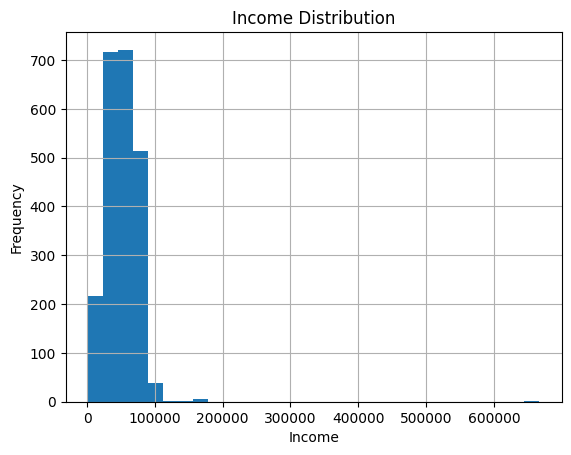

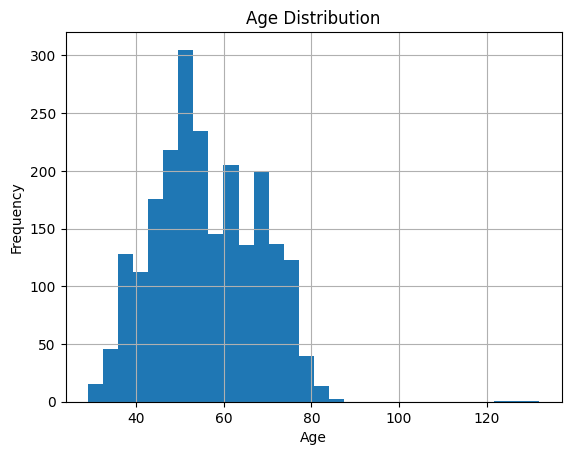

<Figure size 640x480 with 0 Axes>

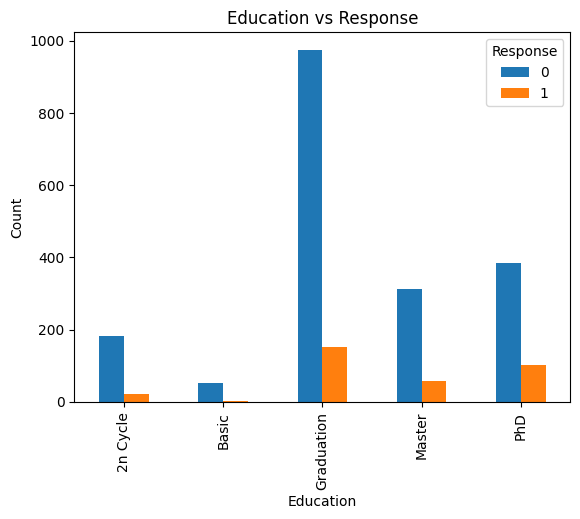

<Figure size 640x480 with 0 Axes>

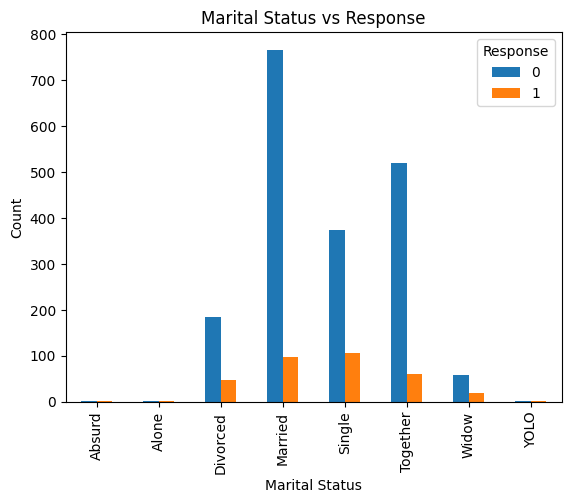

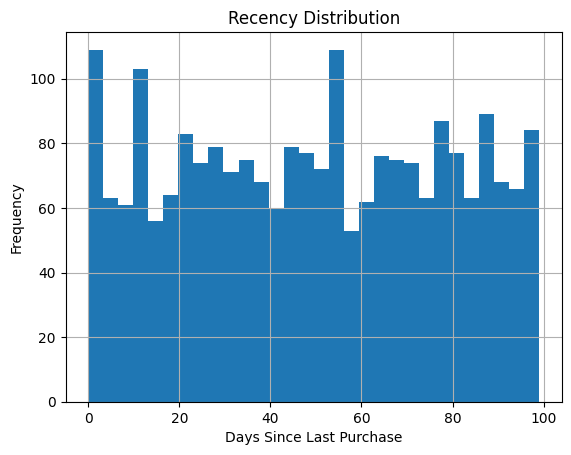

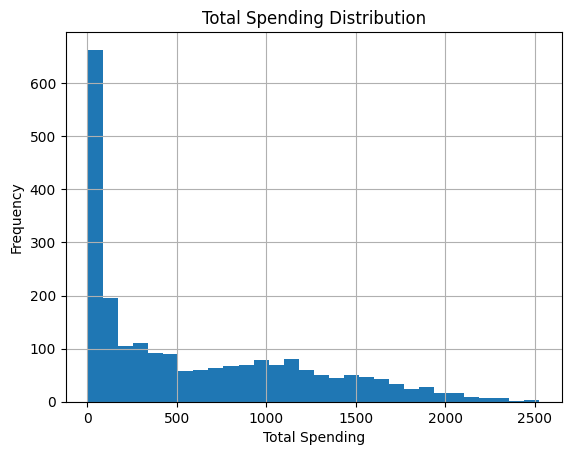

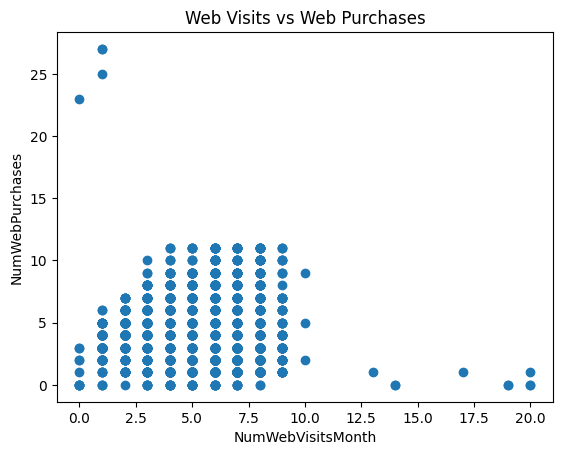

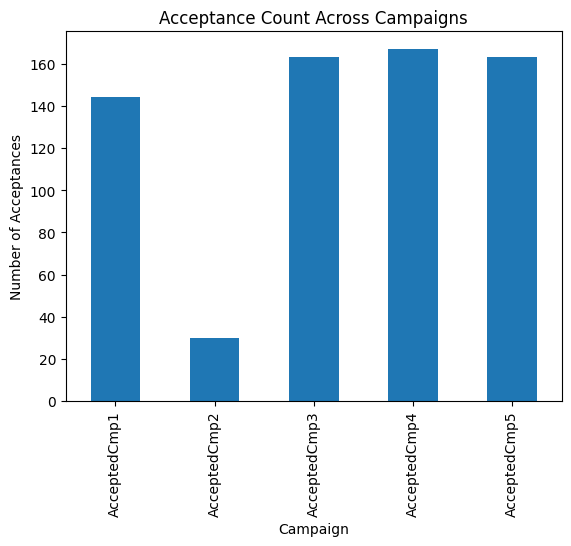

In [9]:
# 1. Target Variable Distribution
plt.figure()
df['Response'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (Response)')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

# 2. Income Distribution
plt.figure()
df['Income'].hist(bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# 3. Age Distribution (Derived Feature)
plt.figure()
age = 2025 - df['Year_Birth']
age.hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 4. Education vs Response
plt.figure()
pd.crosstab(df['Education'], df['Response']).plot(kind='bar')
plt.title('Education vs Response')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# 5. Marital Status vs Response
plt.figure()
pd.crosstab(df['Marital_Status'], df['Response']).plot(kind='bar')
plt.title('Marital Status vs Response')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 6. Recency Distribution
plt.figure()
df['Recency'].hist(bins=30)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Frequency')
plt.show()

# 7. Total Spending Distribution
plt.figure()
total_spending = (
    df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] +
    df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
)
total_spending.hist(bins=30)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# 8. Web Visits vs Web Purchases
plt.figure()
plt.scatter(df['NumWebVisitsMonth'], df['NumWebPurchases'])
plt.title('Web Visits vs Web Purchases')
plt.xlabel('NumWebVisitsMonth')
plt.ylabel('NumWebPurchases')
plt.show()

# 9. Campaign Acceptance Comparison
campaigns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

plt.figure()
df[campaigns].sum().plot(kind='bar')
plt.title('Acceptance Count Across Campaigns')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.show()


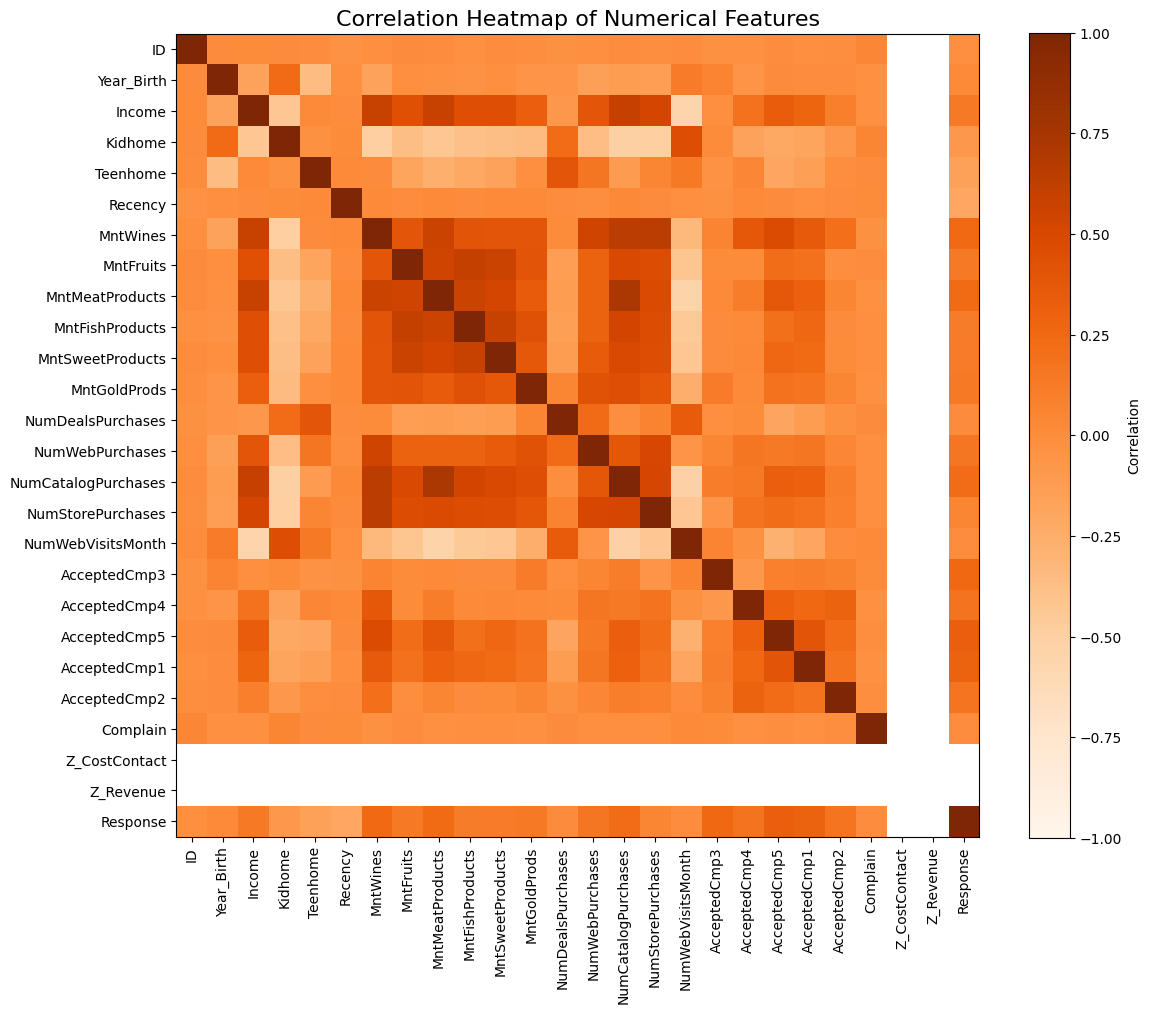

In [10]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap with white to orange colors
plt.figure(figsize=(12, 10))
plt.imshow(corr, cmap='Oranges', vmin=-1, vmax=1)  # white→orange
plt.colorbar(label='Correlation')

plt.title('Correlation Heatmap of Numerical Features', fontsize=16)

# Axis labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.tight_layout()
plt.show()


In [11]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

## Data Preprocessing


In [12]:
# Handle missing values with mean imputation
df["Income"] = df["Income"].fillna(df["Income"].mean())

# Drop non-predictive columns
df_clean = df.drop(["ID", "Z_CostContact", "Z_Revenue"], axis=1)

# Rare and inconsistent marital status categories (Alone, Absurd, YOLO) were merged into the Single category to reduce noise and sparsity
df_clean["Marital_Status"] = df_clean["Marital_Status"].replace(
    ["Alone", "Absurd", "YOLO"],
    "Single"
)

# Convert date to days since enrollment
df_clean["Dt_Customer"] = pd.to_datetime(df_clean["Dt_Customer"])
df_clean["Days_Enrolled"] = (df_clean["Dt_Customer"].max() - df_clean["Dt_Customer"]).dt.days
df_clean = df_clean.drop("Dt_Customer", axis=1)

# Converting Education and Marital_Status to One-Hot encoding
df_clean = pd.get_dummies(
    df_clean,
    columns=["Education", "Marital_Status"],
    drop_first=False
)
# Separate features and target
X = df_clean.drop("Response", axis=1)
y = df_clean["Response"]

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

# save Test data
X_test.to_csv("test.csv", index=False)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Features: {X_train.shape[1]}")

Training set: (1792, 33)
Test set: (448, 33)
Features: 33


In [13]:
results = {}

# 1. Logistic Regression (scaled)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
results["Logistic Regression"] = evaluate_model(
    y_test,
    lr.predict(X_test_scaled),
    lr.predict_proba(X_test_scaled)[:, 1]
)

# 2. Decision Tree (unscaled)
dt = DecisionTreeClassifier(random_state=23)
dt.fit(X_train, y_train)
results["Decision Tree"] = evaluate_model(
    y_test,
    dt.predict(X_test),
    dt.predict_proba(X_test)[:, 1]
)

# 3. KNN (scaled)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
results["KNN"] = evaluate_model(
    y_test,
    knn.predict(X_test_scaled),
    knn.predict_proba(X_test_scaled)[:, 1]
)

# 4. Naive Bayes (scaled)
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
results["Naive Bayes"] = evaluate_model(
    y_test,
    nb.predict(X_test_scaled),
    nb.predict_proba(X_test_scaled)[:, 1]
)

# 5. Random Forest (unscaled)
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)
results["Random Forest"] = evaluate_model(
    y_test,
    rf.predict(X_test),
    rf.predict_proba(X_test)[:, 1]
)

# 6. XGBoost (unscaled)
xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=23
)
xgb.fit(X_train, y_train)
results["XGBoost"] = evaluate_model(
    y_test,
    xgb.predict(X_test),
    xgb.predict_proba(X_test)[:, 1]
)

results_df = pd.DataFrame(results).T
results_df


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Logistic Regression,0.883929,0.910369,0.666667,0.447761,0.535714,0.484526
Decision Tree,0.832589,0.679457,0.442857,0.462687,0.452555,0.353915
KNN,0.863839,0.798292,0.607143,0.253731,0.357895,0.331290
Naive Bayes,0.803571,0.826067,0.400000,0.626866,0.488372,0.388544
Random Forest,0.879464,0.904748,0.724138,0.313433,0.437500,0.423861
XGBoost,0.890625,0.910409,0.695652,0.477612,0.566372,0.517982


| **ML Model Name**            | **Observation about model performance**                                                                                                                                                                                             |
| ---------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Logistic Regression**      | Logistic Regression showed strong overall performance with a high AUC, indicating good class separation. However, its recall was moderate, suggesting that some positive instances were missed due to its linear decision boundary. |
| **Decision Tree**            | The Decision Tree model showed comparatively lower performance across most metrics, indicating possible overfitting and poor generalization to unseen data.                                                                         |
| **KNN**                      | kNN achieved high accuracy but very low recall, meaning it failed to identify many positive cases. This highlights its sensitivity to class imbalance and dependence on distance metrics.                                           |
| **Naive Bayes**              | Naive Bayes achieved the highest recall among all models, making it effective at identifying positive cases. However, this came at the cost of low precision, resulting in more false positives.                                    |
| **Random Forest** | Random Forest provided high precision and good AUC, indicating reliable predictions when identifying positive cases. However, its lower recall suggests a conservative prediction strategy.                                         |
| **XGBoost**       | XGBoost demonstrated the best overall performance, achieving the highest accuracy, F1 score, and MCC. Its balanced precision and recall make it the most suitable model for this dataset.                                           |


In [14]:
# Create directory to store models
os.makedirs("saved_models", exist_ok=True)

# Dictionary of trained models
models = {
    "logistic_regression.pkl": lr,
    "decision_tree.pkl": dt,
    "knn.pkl": knn,
    "naive_bayes.pkl": nb,
    "random_forest.pkl": rf,
    "xgboost.pkl": xgb,
    "scaler.pkl": scaler   # IMPORTANT for scaled models
}

# Save models
for filename, model in models.items():
    with open(f"saved_models/{filename}", "wb") as f:
        pickle.dump(model, f)

print("All models and scaler saved successfully.")


All models and scaler saved successfully.


In [15]:
# Load scaler (needed for LR, KNN, Naive Bayes)
with open("saved_models/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Load model (change filename as needed)
with open("saved_models/xgboost.pkl", "rb") as f:
    model = pickle.load(f)


In [16]:
input_scaled = scaler.transform(np.array([X_test.iloc[23]]))


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [17]:
prediction = model.predict(input_scaled)[0]
probability = model.predict_proba(input_scaled)[0][1]
Actually_class = y_test.iloc[23]

print("Prediction:", "Yes" if prediction == 1 else "No")
print("Probability of Response:", probability)
print("Actual Class:", "Yes" if Actually_class == 1 else "No")

Prediction: No
Probability of Response: 0.011394723
Actual Class: No
